In [1]:
import os
import sys
import numpy as np
import torch
import matplotlib.pyplot as plt
from datetime import datetime

# Add src directory
sys.path.append(os.path.join(os.getcwd(), 'src'))

# Create directories
os.makedirs('models_state', exist_ok=True)
os.makedirs('logs_state', exist_ok=True)
os.makedirs('plots_state', exist_ok=True)

print("🧬 NEAT Training for Chrome Dino Game")
print("="*50)
print("NEAT = NeuroEvolution of Augmenting Topologies")
print("")
print("Key advantages over fixed-topology evolution:")
print("  ✓ Starts with MINIMAL networks (just input→output)")
print("  ✓ Evolves TOPOLOGY + weights (adds neurons/connections)")
print("  ✓ Speciation protects new innovations")
print("  ✓ Historical markings track gene origins")
print("="*50)

🧬 NEAT Training for Chrome Dino Game
NEAT = NeuroEvolution of Augmenting Topologies

Key advantages over fixed-topology evolution:
  ✓ Starts with MINIMAL networks (just input→output)
  ✓ Evolves TOPOLOGY + weights (adds neurons/connections)
  ✓ Speciation protects new innovations
  ✓ Historical markings track gene origins


## 2. 🧬 NEAT Configuration

NEAT evolves both the network **structure** AND **weights**:
- Starts with simple direct connections (input→output)
- Adds hidden nodes through mutation
- Speciation prevents losing novel solutions
- Fitness = game score + survival time

In [2]:
# Load NEAT Trainer with REAL sprites!
import importlib

# Import and reload module
import neat_trainer
importlib.reload(neat_trainer)

from neat_trainer import create_config_file, NEATTrainer, NEATVisualTester

# NEAT Configuration
NEAT_CONFIG = {
    'pop_size': 250,              # 250 dinos per generation
    'generations': 100,           # Number of generations
    'fitness_threshold': 10000,   # Stop if reached
}

print("🧬 NEAT Configuration")
print("="*50)
for k, v in NEAT_CONFIG.items():
    print(f"  {k}: {v}")
print("="*50)

# Create the NEAT config file
config_path = create_config_file("neat_config.txt")
print(f"\n✅ Config file ready: {config_path}")
print(f"\n🦖 Using ORIGINAL Chrome Dino sprites!")
print(f"🎮 Population: {NEAT_CONFIG['pop_size']} dinos")

pygame 2.6.1 (SDL 2.28.4, Python 3.11.14)
Hello from the pygame community. https://www.pygame.org/contribute.html


c:\Users\IC1807\anaconda3\envs\DINO_TF\Lib\site-packages\pygame\pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


🧬 NEAT Configuration
  pop_size: 500
  generations: 100
  fitness_threshold: 10000
✓ NEAT config created: neat_config.txt

✅ Config file ready: neat_config.txt

🦖 Using ORIGINAL Chrome Dino sprites!
🎮 You'll see ALL 500 dinos running together!


## 3. 🚀 Run NEAT Evolution

Watch the best genome of each generation play in real-time!
Networks will evolve from simple (8→3) to complex structures.

In [ ]:
# 🚀 RUN NEAT EVOLUTION - with REAL sprites!
print("🧬 Starting NEAT Evolution...")
print("🦖 Watch the best dino play with REAL sprites!")
print("="*60)

# Create trainer (uses original NEAT logic + real sprites)
trainer = NEATTrainer("neat_config.txt", render=True)

try:
    # Run evolution
    winner = trainer.run(generations=NEAT_CONFIG['generations'])
    
    # Save the winner
    trainer.save_winner('models_state/neat_winner.pkl', winner)
    
    # Also save stats
    import pickle
    with open('models_state/neat_stats.pkl', 'wb') as f:
        pickle.dump({
            'best_scores': trainer.gen_best_scores,
            'avg_scores': trainer.gen_avg_scores,
            'generations': trainer.generation
        }, f)
    
    print(f"\n🏆 Evolution Complete!")
    print(f"   Winner Fitness: {winner.fitness:.0f}")
    print(f"   Best Ever: {trainer.best_fitness:.0f}")

except KeyboardInterrupt:
    print("\n⚠ Evolution interrupted!")
    if trainer.best_genome:
        trainer.save_winner('models_state/neat_interrupted.pkl', trainer.best_genome)
        print(f"   Saved best so far (fitness: {trainer.best_fitness:.0f})")

finally:
    trainer.close()
    print("\n✅ Pygame closed")

🧬 Starting NEAT Evolution...
🦖 Watch ALL 500 dinos running together with REAL sprites!

🧬 Starting NEAT Evolution - 500 Dinos!
   Watch ALL dinos run together!

 ****** Running generation 0 ****** 

  Gen 1: Best=220, Avg=68, Best Ever=220
Population's average fitness: 67.79000 stdev: 12.18794
Best fitness: 220.00000 - size: (3, 24) - species 1 - id 150
Average adjusted fitness: 0.018
Mean genetic distance 1.290, standard deviation 0.266
Population of 500 members in 1 species (after reproduction):
   ID   age  size   fitness   adj fit  stag
  ====  ===  ====  =========  =======  ====
     1    0   500    220.000    0.018     0
Total extinctions: 0
Generation time: 5.684 sec

 ****** Running generation 1 ****** 

  Gen 1: Best=220, Avg=68, Best Ever=220
Population's average fitness: 67.79000 stdev: 12.18794
Best fitness: 220.00000 - size: (3, 24) - species 1 - id 150
Average adjusted fitness: 0.018
Mean genetic distance 1.290, standard deviation 0.266
Population of 500 members in 1 spec

## 4. 📊 Visualize Evolution Progress

C:\Users\IC1807\AppData\Local\Temp\ipykernel_1516\852547570.py:38: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\IC1807\AppData\Local\Temp\ipykernel_1516\852547570.py:39: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  plt.savefig('plots_state/neat_evolution.png', dpi=150)
c:\Users\IC1807\anaconda3\envs\DINO_TF\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\IC1807\anaconda3\envs\DINO_TF\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


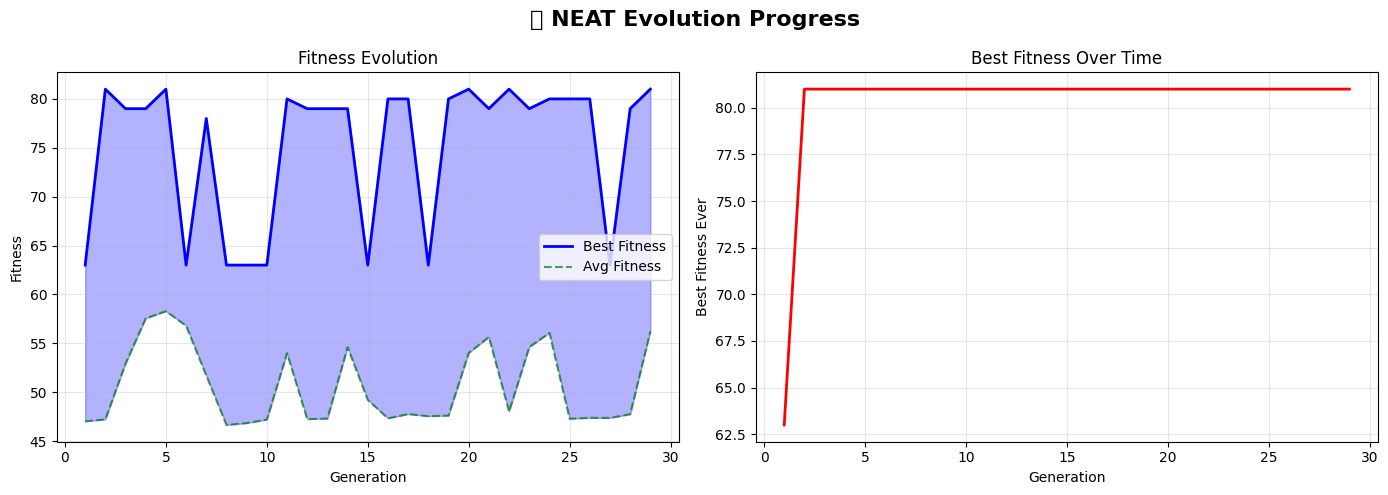

✓ Plot saved to plots_state/neat_evolution.png


In [ ]:
# 📊 Plot NEAT Evolution Progress
import pickle

# Load stats
try:
    with open('models_state/neat_stats.pkl', 'rb') as f:
        stats = pickle.load(f)
    best_scores = stats['best_scores']
    avg_scores = stats['avg_scores']
except:
    # Use from trainer if just ran
    best_scores = trainer.gen_best_scores
    avg_scores = trainer.gen_avg_scores

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('🧬 NEAT Evolution Progress', fontsize=16, fontweight='bold')

generations = range(1, len(best_scores) + 1)

# Fitness over generations
axes[0].plot(generations, best_scores, 'b-', linewidth=2, label='Best Fitness')
axes[0].plot(generations, avg_scores, 'g--', alpha=0.7, label='Avg Fitness')
axes[0].fill_between(generations, avg_scores, best_scores, alpha=0.3, color='blue')
axes[0].set_xlabel('Generation')
axes[0].set_ylabel('Fitness')
axes[0].set_title('Fitness Evolution')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Cumulative best
cumulative_best = np.maximum.accumulate(best_scores)
axes[1].plot(generations, cumulative_best, 'r-', linewidth=2)
axes[1].set_xlabel('Generation')
axes[1].set_ylabel('Best Fitness Ever')
axes[1].set_title('Best Fitness Over Time')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots_state/neat_evolution.png', dpi=150)
plt.show()
print("✓ Plot saved to plots_state/neat_evolution.png")

## 5. 🎮 Test the Winner!

Load and watch the best evolved network play.

In [ ]:
# 🎮 WATCH THE WINNER PLAY!
import pickle
import neat
from neat_trainer import NEATVisualTester

print("🎮 Loading NEAT winner...")

# Load config
config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    "neat_config.txt"
)

# Load winner genome
try:
    with open('models_state/neat_winner.pkl', 'rb') as f:
        winner = pickle.load(f)
except:
    with open('models_state/neat_interrupted.pkl', 'rb') as f:
        winner = pickle.load(f)

print(f"   Fitness: {winner.fitness:.0f}")
print(f"   Nodes: {len(winner.nodes)}")
print(f"   Connections: {len([c for c in winner.connections.values() if c.enabled])}")

# Test the winner
print("\n🦖 Watch the evolved Dino play 5 games!")
tester = NEATVisualTester(winner, config)
test_scores = tester.run(num_games=5)

print(f"\n📊 Test Results:")
print(f"   Average: {np.mean(test_scores):.0f}")
print(f"   Best: {max(test_scores)}")
print(f"   Worst: {min(test_scores)}")

🆕 Starting fresh training with 2 actions (RUN + JUMP only)


## 6. 🔬 Visualize Evolved Network Topology

See how NEAT evolved the network structure from simple to complex!

In [ ]:
# 🔬 Visualize the Evolved Network Topology
import pickle
import neat

# Load winner
try:
    with open('models_state/neat_winner.pkl', 'rb') as f:
        winner = pickle.load(f)
except:
    with open('models_state/neat_interrupted.pkl', 'rb') as f:
        winner = pickle.load(f)

print("🧬 Evolved Network Structure")
print("="*50)

# Input and output node IDs
input_keys = list(range(-8, 0))  # -8 to -1
output_keys = [0, 1, 2]  # RUN, JUMP, DUCK

# Count nodes by type
hidden_nodes = [k for k in winner.nodes.keys() if k not in output_keys]
hidden_count = len(hidden_nodes) - 8  # Subtract input nodes

enabled_connections = [(k, v) for k, v in winner.connections.items() if v.enabled]

print(f"Input Nodes:  8 (distance, width, height, obs_y, dino_y, vel, speed, is_bird)")
print(f"Hidden Nodes: {hidden_count}")
print(f"Output Nodes: 3 (RUN, JUMP, DUCK)")
print(f"Connections:  {len(enabled_connections)}")
print(f"\nFitness: {winner.fitness:.0f}")

# Show connections
print("\n📊 Active Connections:")
print("-"*50)
for (in_node, out_node), conn in sorted(enabled_connections, key=lambda x: (x[0][0], x[0][1])):
    weight = conn.weight
    in_name = f"Input[{in_node+8}]" if in_node < 0 else (f"Hidden[{in_node}]" if in_node > 2 else f"Output[{['RUN','JUMP','DUCK'][in_node]}]")
    out_name = f"Output[{['RUN','JUMP','DUCK'][out_node]}]" if out_node in output_keys else f"Hidden[{out_node}]"
    print(f"  {in_name:15} → {out_name:15}  weight={weight:+.2f}")

print("\n" + "="*50)
print("💡 NEAT started with just 8→3 direct connections")
print(f"   and evolved to {len(enabled_connections)} connections with {hidden_count} hidden nodes!")